In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
import seaborn as sns
import os

In [3]:
city_data_csv = "raw_data/city_data.csv"
ride_data_csv = "raw_data/ride_data.csv"
city_data = pd.read_csv(city_data_csv)
ride_df = pd.read_csv(ride_data_csv)
city_data_clean = pd.DataFrame({'type': city_data.groupby('city').first()['type'],
                                'driver_count': city_data.groupby('city').sum()['driver_count']}).reset_index()
city_data_clean.head()
#ride_df.head()
#city_df
#ride_df

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [4]:
merge_df=pd.merge(city_data_clean,ride_df,on="city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [5]:
avg_fare=merge_df.groupby('city')['fare'].mean()
avg_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [6]:
no_rides_city=merge_df.groupby('city')['ride_id'].count()
no_rides_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [7]:
merge_df.columns


Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [8]:
no_driver_city=merge_df.groupby('city')['driver_count'].mean()
#no_driver_city

In [9]:
city_type=merge_df.groupby('city')['type'].all()
city_type.head()

city
Alvarezhaven       Urban
Alyssaberg         Urban
Anitamouth      Suburban
Antoniomouth       Urban
Aprilchester       Urban
Name: type, dtype: object

In [10]:
total = pd.DataFrame({"Avg fare": avg_fare,
                                   "No of rides per city": no_rides_city,
                                   "No of driver per city": no_driver_city,
                                   "City Type": city_type,
                                   
})

total.head()

,Avg fare,City Type,No of driver per city,No of rides per city
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [11]:
#total['No of rides per city'].max()

In [12]:
total.columns

Index(['Avg fare', 'City Type', 'No of driver per city',
       'No of rides per city'],
      dtype='object')

In [13]:
total_urban=total.loc[total['City Type']=='Urban',:]
#total_urban.head()

In [14]:
total_rural=total.loc[total['City Type']=='Rural',:]
#total_rural

In [15]:
total_sub=total.loc[total['City Type']=='Suburban',:]
#total_sub


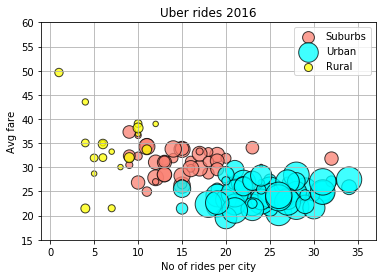

In [16]:
#total_sub.plot(kind='scatter', x='No of rides per city', y='Avg fare',s=total_sub['No of driver per city']*10, marker="o")
sub =plt.scatter(total_sub['No of rides per city'], total_sub['Avg fare'],s=total_sub['No of driver per city']*10,facecolors="salmon",edgecolors="black",label ='Suburbs', alpha = .75)
rural=plt.scatter(total_rural['No of rides per city'],total_rural['Avg fare'],s=total_rural['No of driver per city']*10,facecolors="yellow",edgecolors="black",label ='Rural', alpha = .75)
urban=plt.scatter(total_urban['No of rides per city'],total_urban['Avg fare'],s=total_urban['No of driver per city']*10,facecolors="cyan",edgecolors="black",label ='Urban', alpha = .75)

plt.title("Uber rides 2016")
plt.xlabel("No of rides per city")
plt.ylabel("Avg fare")
plt.grid()

#plt.xlim(0, 10)
plt.ylim(15, 60)

plt.legend(handles=[sub,urban,rural], loc="best")

plt.show()

In [19]:
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [20]:
pie_chart_fare=merge_df.groupby('type')['fare'].sum()
pie_chart_fare

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

([<matplotlib.patches.Wedge at 0x20a509bada0>,
 [Text(-0.97154,0.515859,'Rural'),
  Text(-0.858531,-0.687695,'Suburb'),
  Text(1.0724,0.538475,'Urban')],
 [Text(-0.529931,0.281378,'6.7%'),
  Text(-0.46829,-0.375106,'30.3%'),
  Text(0.625568,0.31411,'63.0%')])

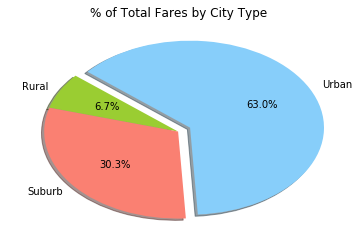

In [28]:
labels = ["Rural", "Suburb", "Urban"]
# The colors of each section of the pie chart
colors = ["yellowgreen", "salmon", "lightskyblue"]
plt.title("% of Total Fares by City Type")

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
plt.pie(pie_chart_fare,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [29]:
pie_chart_rides=merge_df.groupby('type')['ride_id'].count()
pie_chart_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

Text(0.5,1,'% of Total Rides by City Type')

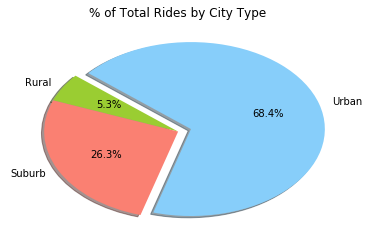

In [30]:
plt.pie(pie_chart_rides,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")


In [31]:
pie_chart_driver=city_data_clean.groupby('type')['driver_count'].sum()
pie_chart_driver


type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

Text(0.5,1,'% of Total Drivers by City Type')

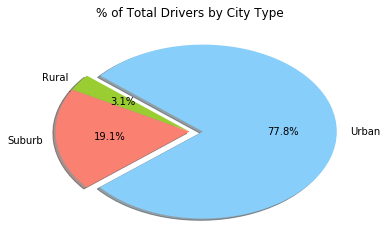

In [32]:
plt.pie(pie_chart_driver,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")